<a href="https://colab.research.google.com/github/diyorarti/classification-problem/blob/main/decision_tree_algorithms_is_to_predict_satisfaction_of_airplane_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Data prepariation

In [3]:
data = pd.read_csv('/content/train_dataset.csv')
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
encoder = OrdinalEncoder()

cat_col = data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]=encoder.fit_transform(cat_col)

data = data.fillna({'Arrival Delay in Minutes':np.mean(data['Arrival Delay in Minutes'])})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  float64
 2   Customer Type                      10000 non-null  float64
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  float64
 5   Class                              10000 non-null  float64
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [42]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.0,0.0,54,1.0,1.0,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9996,9997,0.0,0.0,54,0.0,2.0,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9997,9998,1.0,0.0,46,0.0,0.0,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9998,9999,0.0,0.0,41,0.0,0.0,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


In [20]:
data.shape

(10000, 24)

# Desicion Tree


In [65]:
drop_col = ['id', 'satisfaction']

x = data.drop(drop_col, axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)


In [66]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
print(f'model accuracy {acc}')

model accuracy 0.9165


# Feature Scaling

In [68]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [69]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [70]:
yhat = model.predict(x_test_scaled)
acc = accuracy_score(y_test, yhat)
print(f'model accuracy {acc}')

model accuracy 0.91475


# Polynomial Feature

In [78]:
poly = PolynomialFeatures(degree=4)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [79]:
model = DecisionTreeClassifier()
model.fit(x_train_mapped, y_train)

DecisionTreeClassifier()

In [80]:
yhat = model.predict(x_test_mapped)
acc = accuracy_score(y_test, yhat)
print(f'model accuracy {acc}')

model accuracy 0.909


# Scaling and Polynomial Featue together

In [81]:
x_train_maped_scaled = scaler.fit_transform(x_train_mapped)
x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [82]:
model = DecisionTreeClassifier()
model.fit(x_train_maped_scaled, y_train)

DecisionTreeClassifier()

In [83]:
yhat = model.predict(x_test_mapped_scaled)
acc = accuracy_score(y_test, yhat)
print(f'model accuracy {acc}')

model accuracy 0.8925


# Feature Engineering

In [84]:
data.corrwith(data['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Gate location                        0.007169
id                                   0.002931
Gender                              -0.002601
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes            -0.048582
Departure/Arrival time convenient   -0.067638
Customer Type                     

In [120]:
drop_columns = ['Gender', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient','Customer Type', 'Class', 'Type of Travel', 'satisfaction']

x = data.drop(drop_columns, axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

In [121]:
poly = PolynomialFeatures(degree=4, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

scaler = StandardScaler()

x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [122]:
model = DecisionTreeClassifier()
model.fit(x_train_mapped_scaled, y_train)

DecisionTreeClassifier()

In [124]:
test_yhat = model.predict(x_test_mapped_scaled)
acc = accuracy_score(y_test, test_yhat)
print(f'model accuracy with test set {acc}')

model accuracy with test set 0.83275


# working on bais and veriance problems

# evaluate the data set

In [100]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [8]:
drop_columns = ['satisfaction']

x = data.drop(drop_columns, axis=1)
y = data[['satisfaction']]


x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_cv = {x_cv.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_cv = {y_cv.shape}')
print(f'y_test = {y_test.shape}')

x_train = (6000, 23)
x_cv = (2000, 23)
x_test = (2000, 23)
y_train = (6000, 1)
y_cv = (2000, 1)
y_test = (2000, 1)


# best degree for polynomial feature

In [9]:
train_accuracy = []
cv_accuracy = []

for i in range(1, 4):
  poly = PolynomialFeatures(degree=i, include_bias=False)

  x_train_mapped = poly.fit_transform(x_train)
  x_cv_mapped = poly.fit_transform(x_cv)

  model = DecisionTreeClassifier()
  model.fit(x_train_mapped, y_train)

  train_yhat = model.predict(x_train_mapped)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv_mapped)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

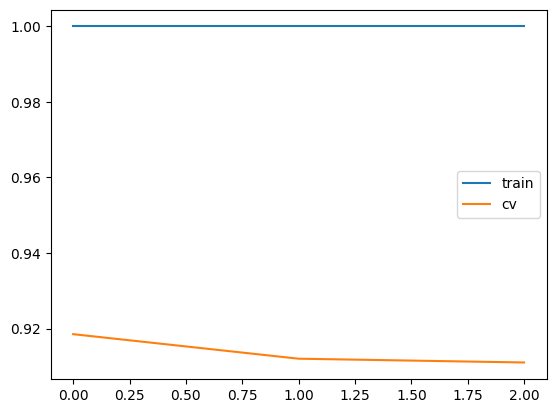

In [10]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.show()

# best number for min_samples_split

In [16]:
split_list = [2, 4, 8, 10, 20, 40, 80, 100]

train_accuracy = []
cv_accuracy = []

for i in split_list:
  model = DecisionTreeClassifier(min_samples_split=i)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

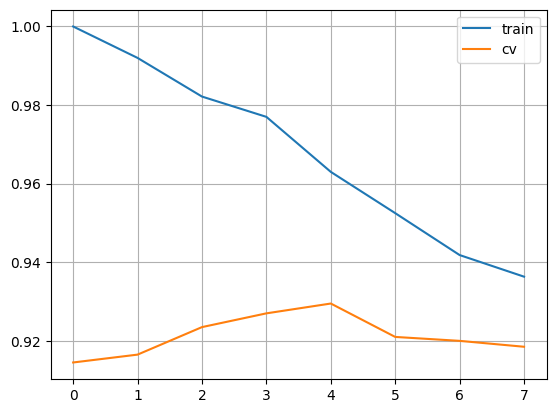

In [17]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.grid()
plt.show()

#  best value for max_depth

In [13]:
max_depth_list = [2, 4, 8, 10, 20, 40, 50]

train_accuracy = []
cv_accuracy = []

for i in max_depth_list:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

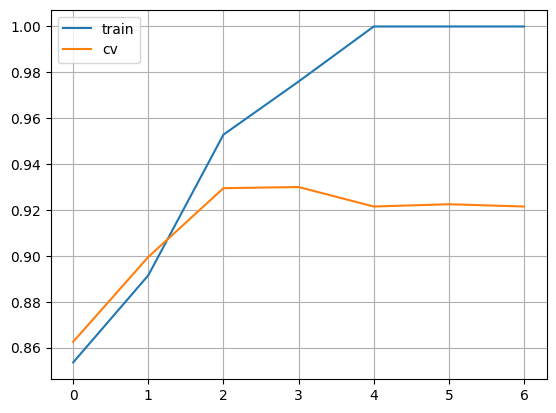

In [15]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.grid()
plt.show()

#  best Decision Tree model

In [18]:
model = DecisionTreeClassifier(min_samples_split = 20,
                               max_depth = 8,
                               random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=20, random_state=1)

In [19]:
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
print(f'accuracy score  {acc}')

accuracy score  0.921


# Random Forest

# best min_samples_split

In [22]:
split_list = [2, 4, 8, 10, 20, 40, 80, 100]

train_accuracy = []
cv_accuracy = []

for i in split_list:
  model = RandomForestClassifier(min_samples_split=i)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

<ipython-input-22-dc9a2d81f417>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-22-dc9a2d81f417>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-22-dc9a2d81f417>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-22-dc9a2d81f417>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-22-dc9a2d81f417>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

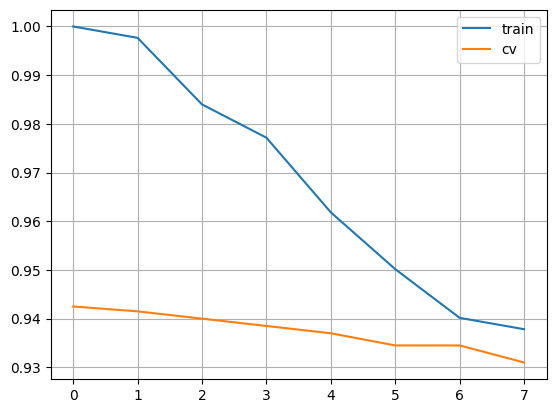

In [23]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.grid()
plt.show()

In [30]:
max_depth_list = [2, 10, 20, 40, 50, 80]

train_accuracy = []
cv_accuracy = []

for i in max_depth_list:
  model = RandomForestClassifier(max_depth=i)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

<ipython-input-30-016ef3b425b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-30-016ef3b425b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-30-016ef3b425b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-30-016ef3b425b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-30-016ef3b425b8>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

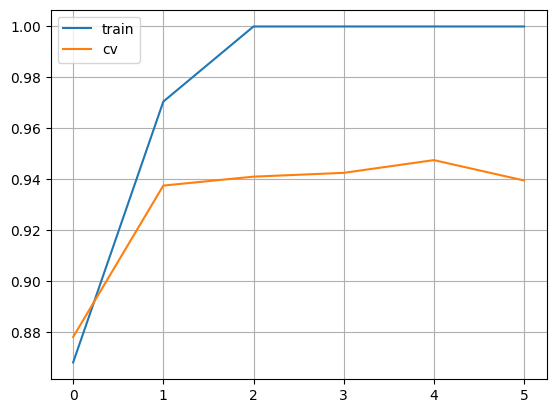

In [31]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.grid()
plt.show()

In [32]:
n_estimators_list = [10,50,100,500]

train_accuracy = []
cv_accuracy = []

for i in n_estimators_list:
  model = RandomForestClassifier(n_estimators = i)
  model.fit(x_train, y_train)

  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_accuracy.append(train_acc)

  cv_yhat = model.predict(x_cv)
  cv_acc = accuracy_score(y_cv, cv_yhat)
  cv_accuracy.append(cv_acc)

<ipython-input-32-40d250cfd978>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-32-40d250cfd978>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-32-40d250cfd978>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-32-40d250cfd978>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


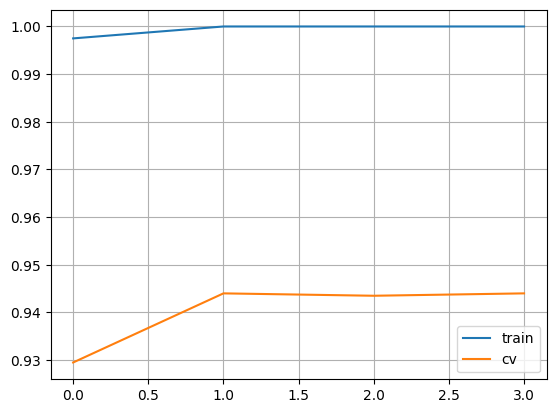

In [33]:
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['train', 'cv'])
plt.grid()
plt.show()

# best random forest model

In [34]:
model = RandomForestClassifier(min_samples_split=2,
                               max_depth = 50,
                               n_estimators = 50,
                               random_state = 1)
model.fit(x_train, y_train)

<ipython-input-34-ca4ea3d385b5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(max_depth=50, n_estimators=50, random_state=1)

In [35]:
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
print(f' accuracy {acc}')

 accuracy 0.94


In [36]:
xgb_model = XGBClassifier(n_estimators = 500,
                          learning_rate = 0.1,
                          verbosity = 1,
                          random_state = 1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [37]:
yhat = xgb_model.predict(x_test)
acc = accuracy_score(y_test, yhat)
print(f' accuracy {acc}')

 accuracy 0.949


# xgb boost has been the best model for this problem